# FINM 25000 - Summer 2025
### Instructor: Mark Hendricks

## Homework #3
### Using student-made ipynb by Lance Emry.

**Background Case**: Smart Beta Exchange-Traded Funds and Factor Investing

No need to study/review the entire case and all the exhibits beyond what is useful in addressing the
homework questions. But they are interesting and very informative if you are inclined.

## 1. Factor Investing

*This section is not graded, and you do not need to submit your answers. We will discuss these issues in class.*

1. **Describe the four factors**: Market, Size, Value, and Momentum.
   - Are they constructed from portfolios going long stocks or portfolios that go long some stocks and short others?
   - What is the point of figures 1–6?

2. How is a “smart beta” ETF different from a traditional ETF?

3. Is it possible for all investors to invest in the Value factor?

4. How does factor investing differ from traditional diversification?

## 2. Pricing Factors and Assets

On Github, find the data files
•# factor pricing data.xlsx
Note that the FF factor labels are as follows:
- Market: MKT
- Size: SMB (Small Minus Big)
- Value: HML (High Minus Low)
- Momentum: UMD (Up Minus Down)


### 1. The Factors
Calculate their univariate performance statistics:
- mean
- volatility
- Sharpe ratio
- VaR(.05)

Does each factor have a premium (positive expected excess return)?

This part was completed by Georgia Martin

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from google.colab import drive
drive.mount('/content/drive')
factors_df = pd.read_excel('/content/drive/My Drive/factor_pricing_data.xlsx', sheet_name='factors (excess returns)', index_col=0,parse_dates=[0])

Mounted at /content/drive


In [ ]:
def calc_return_metrics(rets, adj_factor=12):
    """
    Calculate return metrics for a given dataset. Specifically:
    - Annualized Return
    - Annualized Volatility
    - Annualized Sharpe Ratio

    Args:
        rets : Returns time series.
        adj (int, optional): Annualization. Defaults to 12.

    Returns:
        DataFrame or dict: Summary of return metrics.
    """
    summary = {}
    summary['Annualized Mean'] = rets.mean() * adj_factor
    summary['Annualized Volatility'] = rets.std() * np.sqrt(adj_factor)
    summary['Annualized Sharpe Ratio'] = (
        summary['Annualized Mean'] / summary['Annualized Volatility']
        )
    summary['VaR (.05)'] = rets.quantile(0.05, axis=0)
    return pd.DataFrame(summary, index=rets.columns)

In [ ]:
factors_metrics = calc_return_metrics(factors_df)
display(factors_metrics)

,Annualized Mean,Annualized Volatility,Annualized Sharpe Ratio,VaR (.05)
MKT,0.084944,0.156374,0.543210,-0.072470
SMB,0.005420,0.101365,0.053469,-0.043155
HML,0.026508,0.108907,0.243402,-0.042210
RMW,0.045139,0.083055,0.543484,-0.028485
CMA,0.027686,0.072496,0.381900,-0.027855
UMD,0.061769,0.153524,0.402343,-0.068035


Each factor has a premium, as each annualized mean is positive.

### 2. Factor Correlations
The factors are constructed in such a way as to reduce correlation between them.
Report the correlation matrix across the three factors.
- Does the construction method succeed in keeping correlations small?

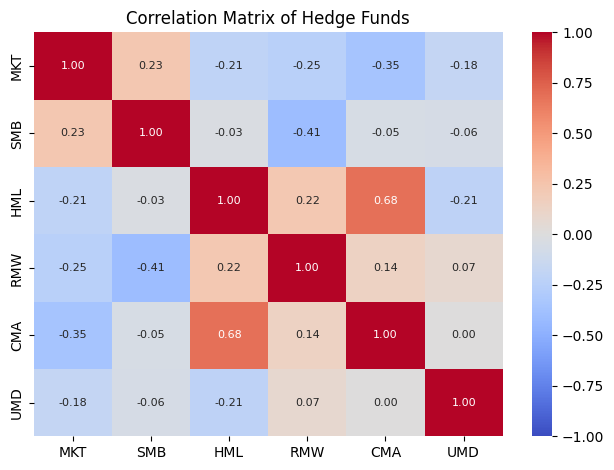

In [ ]:
corr_matrix = factors_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f", annot_kws={"size": 8})
plt.title('Correlation Matrix of Hedge Funds')
plt.tight_layout()
plt.show()

Yes- the highest correlation is 0.68, however the rest of the correlations are below 0.4.

### 3. Cumulative Returns
Plot the cumulative returns of the factors.

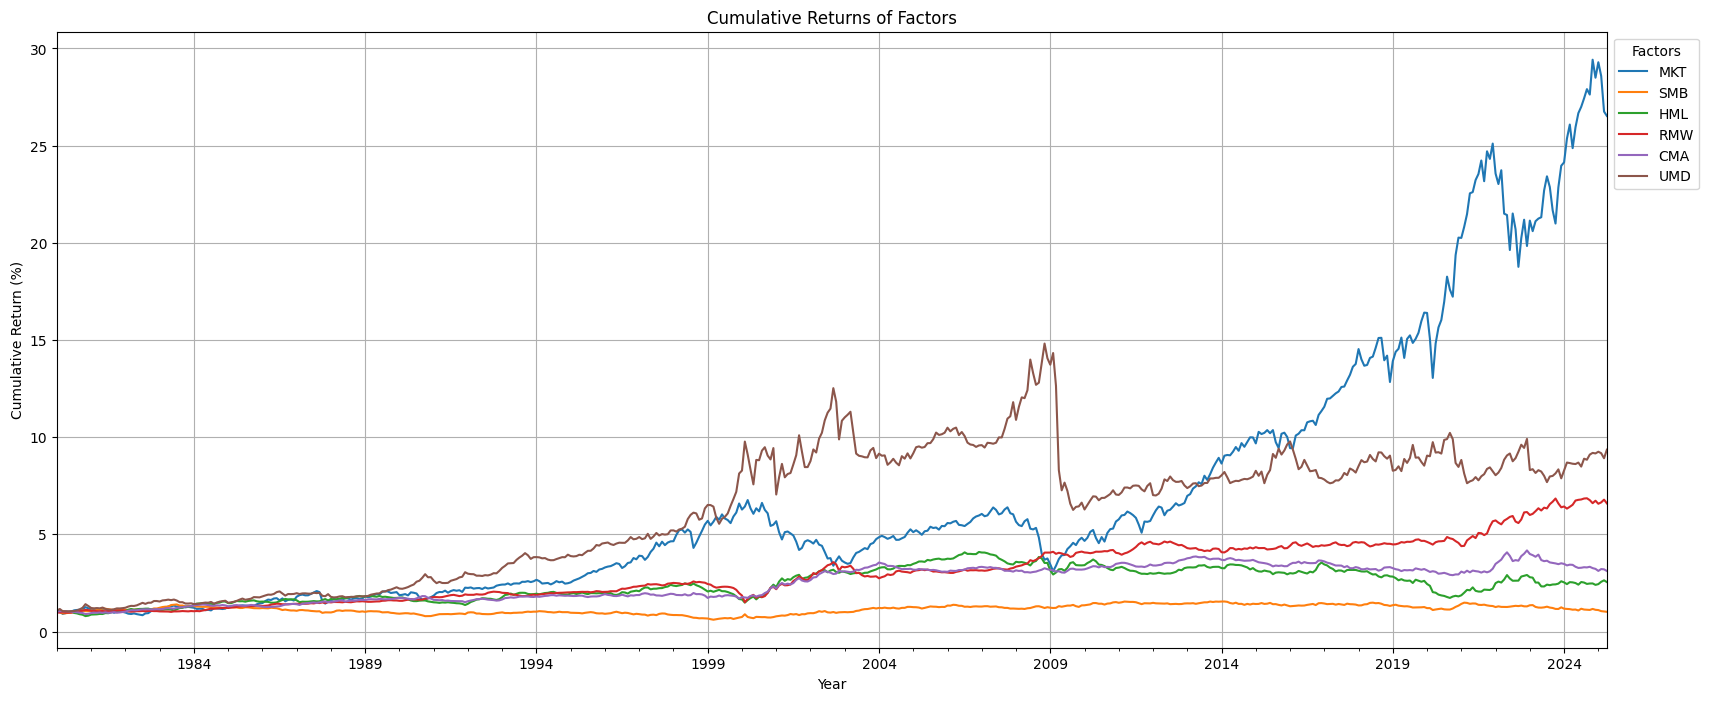

In [ ]:
def cumulative_returns(df):
  cumulative_returns = (1 + df).cumprod()
  cumulative_returns.plot(title="Cumulative Returns of Factors", figsize=(20, 8))
  plt.xlabel("Year")
  plt.ylabel("Cumulative Return (%)")
  plt.grid(True)
  plt.legend(title="Factors", loc="upper left", bbox_to_anchor=(1, 1))
  plt.show()
cumulative_returns(factors_df)

### 4. Test Assets
UThe “assets” tab provides monthly excess return data on various industry stock-portfolios.
Denote these as $r^i$, for n = 1, . . . , 12.
Calculate the (annualized) univariate statistics from 1.1.


In [ ]:
assets_df = pd.read_excel('/content/drive/My Drive/factor_pricing_data.xlsx', sheet_name='portfolios (excess returns)', index_col=0,parse_dates=[0])
port_metrics = calc_return_metrics(assets_df)
display(port_metrics)

,Annualized Mean,Annualized Volatility,Annualized Sharpe Ratio,VaR (.05)
Agric,0.090492,0.216219,0.418519,-0.088570
Food,0.091434,0.149871,0.610083,-0.059965
Soda,0.107166,0.218976,0.489398,-0.092900
Beer,0.106462,0.170226,0.625419,-0.066550
Smoke,0.139915,0.223470,0.626101,-0.091665
Toys,0.058412,0.246793,0.236683,-0.106830
Fun,0.123368,0.265573,0.464537,-0.109310
Books,0.068678,0.206901,0.331936,-0.086435
Hshld,0.077151,0.153228,0.503504,-0.068040
Clths,0.087042,0.226623,0.384083,-0.101655


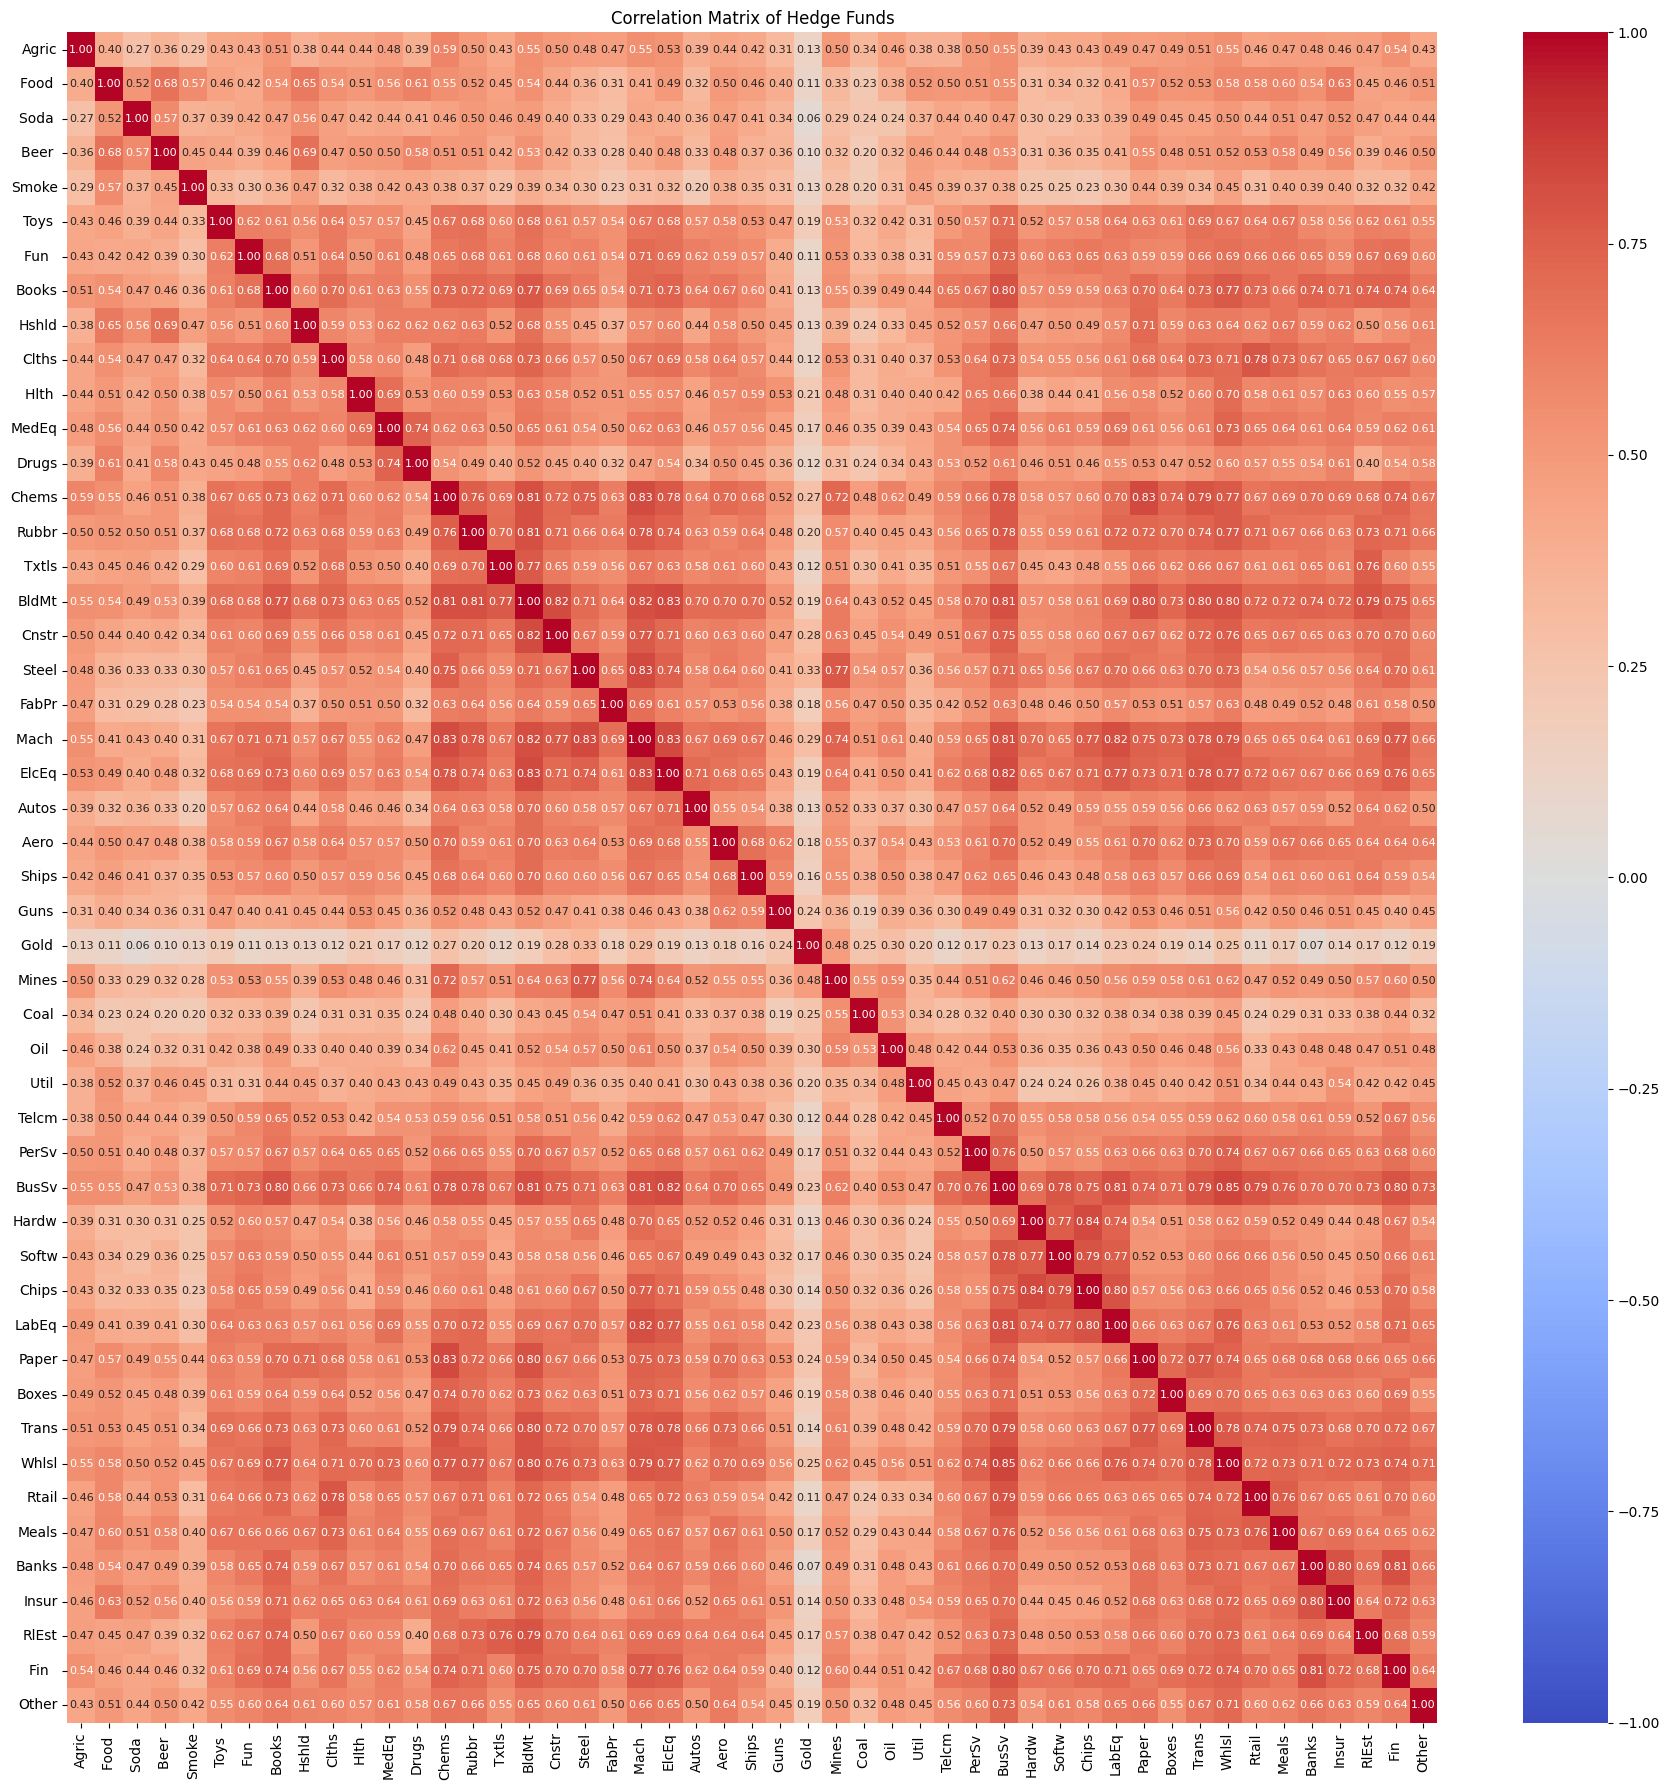

In [ ]:
corr_matrix = assets_df.corr()
plt.figure(figsize=(18, 18))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f", annot_kws={"size": 8})
plt.title('Correlation Matrix of Hedge Funds')
plt.tight_layout()
plt.show()

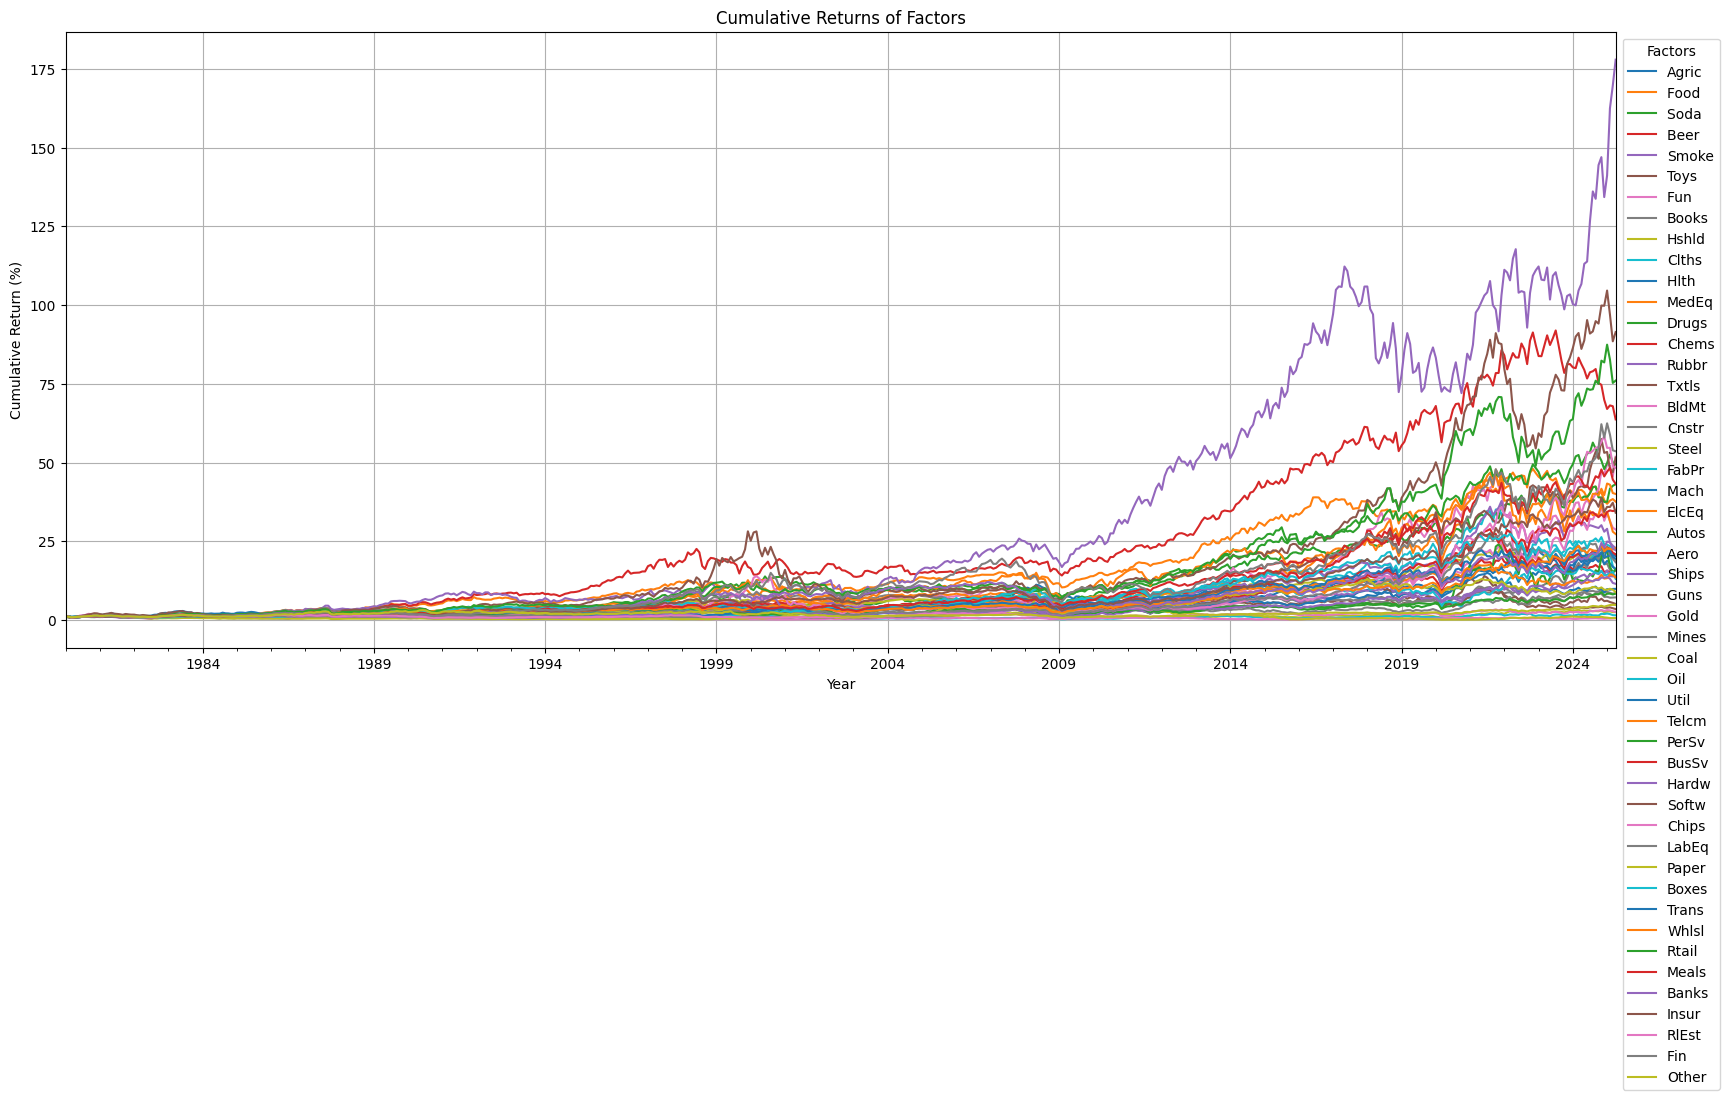

In [ ]:
cumulative_returns(assets_df)

### 5. Mean-Variance Explanation
Can the difference in mean excess returns of the portfolios be explained by differences in their volatilities? Or by their VaR(.05) statistics?

No. These assets are (for the most part) highly correlated, as seen on the correlation map. However, their volativities and VaR(.05)'s are not close. Thus, we can not contribute their difference in mean excess returns to their volativities or VaR(.05).

## 3. CAPM
The Capital Asset Pricing Model (CAPM) asserts that an asset (or portfolio’s) expected excess return is completely a function of its beta to the equity market index (SPY, or in this case, MKT.)

Specifically, it asserts that, for any excess return, $\tilde{r}^i$, its mean is proportional to the mean excess return of the market, $\tilde{f}^{\text{mkt}}$, where the proportionality is the regression beta of $\tilde{r}^i$ on $\tilde{f}^{\text{mkt}}$:

$$
\mathbb{E}[\tilde{r}^i_t] = \beta^{i, \text{mkt}} \, \mathbb{E}[\tilde{f}^{\text{mkt}}_t] \tag{CAPM}
$$

Let’s examine whether that seems plausible.

### 1. Time-Series Regression
For each of the n = 12 test assets, run the CAPM time-series regression:

$$\tilde{r}_i^t = \alpha_i + \beta_{i,\text{mkt}} \tilde{f}_{\text{mkt}}^t + \epsilon_i^t $$

So you are running 12 separate regressions, each using the T-sized sample of time-series data.

Section completed by William Du, edited by Georgia Martin

In [40]:
betas = {}
alphas = {}
treynors = {}
info_ratios = {}

for col in assets_df.columns:
    y = assets_df[col]
    x = sm.add_constant(factors_df['MKT'])
    model = sm.OLS(y, x).fit()

    beta = model.params['MKT']
    alpha = model.params['const']

    m_ret = y.mean() * 12
    te = model.resid.std(ddof=0) * np.sqrt(12)

    treynor = m_ret / beta
    info_ratio = alpha * 12 / te

    betas[col] = beta
    alphas[col] = alpha
    treynors[col] = treynor
    info_ratios[col] = info_ratio
summary_df = pd.DataFrame({
    'Alpha': pd.Series(alphas) * 12,  # annualized
    'Beta': pd.Series(betas),
    'Treynor Ratio': pd.Series(treynors),
    'Information Ratio': pd.Series(info_ratios)
})
summary_df = summary_df.sort_index()
display(summary_df)

,Alpha,Beta,Treynor Ratio,Information Ratio
Aero,0.014423,1.065711,0.098478,0.094161
Agric,0.022874,0.796025,0.113680,0.129503
Autos,-0.008430,1.342937,0.078666,-0.039039
Banks,0.000959,1.071917,0.085838,0.007183
Beer,0.053355,0.625208,0.170283,0.383234
BldMt,-0.001988,1.199472,0.083287,-0.016077
Books,-0.022408,1.072299,0.064047,-0.185038
Boxes,0.008186,0.950198,0.093559,0.061764
BusSv,-0.008751,1.104792,0.077023,-0.118966
Chems,-0.012737,1.069858,0.073039,-0.113081


### 2. Report Metrics
Report the estimated $\beta_{i,\text{mkt}}$, Treynor Ratio, $\alpha_i$, and Information Ratio for each of the n regressions

In [35]:
capm_stats = pd.DataFrame({
    'Beta': pd.Series(betas),
    'Alpha': pd.Series(alphas),
    'Treynor Ratio': pd.Series(treynors),
    'Information Ratio': pd.Series(info_ratios)
})
display(capm_stats)

,Beta,Alpha,Treynor Ratio,Information Ratio
Agric,0.796025,0.001906,0.113680,0.129503
Food,0.575366,0.003547,0.158914,0.355409
Soda,0.696773,0.003998,0.153804,0.252830
Beer,0.625208,0.004446,0.170283,0.383234
Smoke,0.611540,0.007331,0.228791,0.435940
Toys,1.110894,-0.002996,0.052581,-0.205280
Fun,1.302473,0.001061,0.094719,0.074768
Books,1.072299,-0.001867,0.064047,-0.185038
Hshld,0.687143,0.001565,0.112278,0.172095
Clths,1.084627,-0.000424,0.080251,-0.033901


### 3
If (CAPM) were true, what would be true of the Treynor Ratios, alphas, and Information Ratios?

If CAPM holds, every asset’s Treynor Ratio should equal the market’s Sharpe ratio, all alphas must be zero, and all information ratios should be zero.

### 4
Calculate the mean-absolute-error of the estimated alphas, (one for each security $\tilde{r^i})$.

$$
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |\hat{\alpha}^i|
$$

If the pricing model worked, should these alpha estimates be large or small? Why? Based on your MAE stat, does this seem to support the pricing model or not?

In [36]:
mae = capm_stats['Alpha'].abs().mean()
avg = assets_df.mean().mean()

print('CAPM statistics:')
print(capm_stats)

print('\nMean Exces Return of all assets:', avg)
print('\nMean absolute error of alphas:', mae)

CAPM statistics:
           Beta     Alpha  Treynor Ratio  Information Ratio
Agric  0.796025  0.001906       0.113680           0.129503
Food   0.575366  0.003547       0.158914           0.355409
Soda   0.696773  0.003998       0.153804           0.252830
Beer   0.625208  0.004446       0.170283           0.383234
Smoke  0.611540  0.007331       0.228791           0.435940
Toys   1.110894 -0.002996       0.052581          -0.205280
Fun    1.302473  0.001061       0.094719           0.074768
Books  1.072299 -0.001867       0.064047          -0.185038
Hshld  0.687143  0.001565       0.112278           0.172095
Clths  1.084627 -0.000424       0.080251          -0.033901
Hlth   0.953491 -0.000238       0.081955          -0.015944
MedEq  0.881638  0.001921       0.111098           0.200691
Drugs  0.715541  0.003225       0.139026           0.330084
Chems  1.069858 -0.001061       0.073039          -0.113081
Rubbr  1.054351  0.000108       0.086177           0.010434
Txtls  1.183385 -0.0020

According to CAPM alphas should be zero because beta explains all extra return. In our data the average absolute alpha is only 0.00179 per month while the average monthly excess return is 0.00742. A pricing error of 0.18 percent per month is small compared to these returns and their volatility. This shows that beta alone explains most of the differences in portfolio performance and that CAPM works fairly well.

## 4. A Multifactor Model
Perhaps expected excess returns are determined by multiple factors, not just the market factor as hypothesized by the CAPM. Try the following 4-factor model:

$$
\mathbb{E}[\tilde{r}^i] = \beta^{i,\text{mkt}} \, \mathbb{E}[\tilde{f}^{\text{mkt}}] + \beta^{i,\text{smb}} \, \mathbb{E}[\tilde{f}^{\text{smb}}] + \beta^{i,\text{hml}} \, \mathbb{E}[\tilde{f}^{\text{hml}}] + \beta^{i,\text{umd}} \, \mathbb{E}[\tilde{f}^{\text{umd}}]
$$

Let’s use regression methods to test whether the selected four pricing factors work.
For each equity security, estimate the following regression to test the 4-factor model:
$$
\tilde{r}^i_t = \alpha^i + \beta^{i,\text{mkt}} \tilde{f}^{\text{mkt}}_t + \beta^{i,\text{smb}} \tilde{f}^{\text{smb}}_t + \beta^{i,\text{hml}} \tilde{f}^{\text{hml}}_t + \beta^{i,\text{umd}} \tilde{f}^{\text{umd}}_t + \epsilon_t
$$
So you are running that regression 12 times, once for each security $\tilde{r^i}$

### 1. Time-Series Regression (Four-Factor Model)
For each regression, report the estimated $\alpha$ and r-squared.

Section completed by Georgia Martin

In [ ]:
def multi_reg(factors,returns_df,adj=12):
  """
  Performs multivariate regression of each asset in `returns_df` on `factors`.

  Args:
    factors (pd.DataFrame): Explanatory variables (e.g., MKT, SMB, HML, UMD)
    returns_df (pd.DataFrame): Multiple asset return series (each column = asset)
    adj (int): Annualization factor (default = 12 for monthly data)

  Returns:
    pd.DataFrame: Summary statistics for each asset
  """
  results = []

  for asset in returns_df.columns:
      y = returns_df[asset]
      X = sm.add_constant(factors)
      model = sm.OLS(y, X, missing='drop').fit()

      res = {
          'Alpha': model.params['const'] * adj,
            'R-squared': model.rsquared,
            'Tracking Error': model.resid.std() * (adj**0.5)
        }

        # Add each factor's beta
      for factor in factors.columns:
          res[f'Beta_{factor}'] = model.params[factor]

      res['Asset'] = asset
      results.append(res)
  return pd.DataFrame(results).set_index('Asset')
summary_df = multi_reg(factors_df, assets_df)
display(summary_df)

,Alpha,R-squared,Tracking Error,Beta_MKT,Beta_SMB,Beta_HML,Beta_RMW,Beta_CMA,Beta_UMD
Asset,,,,,,,,,
Agric,0.002660,0.362180,0.172681,0.811475,0.345581,0.105829,0.147576,0.121681,0.067882
Food,-0.005677,0.488061,0.107233,0.728636,-0.077423,-0.023429,0.488977,0.473676,0.017354
Soda,0.008270,0.314163,0.181345,0.821395,-0.013326,0.013597,0.522849,0.431630,-0.108727
Beer,0.000442,0.446604,0.126632,0.785799,-0.093377,-0.185426,0.590379,0.518917,0.059522
Smoke,0.027091,0.296720,0.187406,0.816547,-0.115533,-0.057717,0.634696,0.755234,-0.063784
Toys,-0.050608,0.561517,0.163421,1.075256,0.604414,-0.185716,0.513906,0.274704,-0.185726
Fun,0.043328,0.619023,0.163920,1.184806,0.245768,0.036284,-0.022085,-0.253310,-0.240984
Books,-0.041202,0.706983,0.111998,1.092305,0.296320,0.209046,0.316944,0.048811,-0.092439
Hshld,-0.021537,0.588175,0.098332,0.810782,-0.052003,-0.226577,0.496368,0.517598,-0.010216


### 2
Calculate the mean-absolute-error of the estimated alphas (one for each security, $\tilde{r}^i$):

$$
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |\hat{\alpha}^i|
$$

If the pricing model worked, should these alpha estimates be large or small? Why? Based on your MAE stat, does this seem to support the pricing model or not?

In [ ]:
print("MAE =", summary_df["Alpha"].abs().mean())

MAE = 0.02866814047549071


This MAE suggests that the alphas on avergae deviate 2.9% from zero. If the pricing model worked, the estimates should be small because the "unexplained" factor should be close to zero. So, this model works moderately, as alpha is semi-close to zero.

## 5. Extensions *(Ungraded)*

This section is not graded, and you do not need to submit your answers. This is only provided for those interested in further study.



### 1. Pricing Factors and Mean-Variance Optimality

The Fundamental Theorem of Asset Pricing says that these priced factors are sufficient to construct the Tangency Portfolio. Let’s examine both of those implications for the excess returns of the 4 factors, $\tilde{f}^i$, as tested on the industry equity excess returns $\tilde{r}^i$.

(a) Use the “RF” factor in the Fama-French data to convert both the factor data and the equity data into excess returns.

(b) Report the mean excess return for the four factors. Are they all strongly positive? If one of the means is negative, what would that say about the pricing model?

(c) Report the correlation matrix of the four factors’ excess returns.

(d) Use both the equity data, $\tilde{r}$, and factor data, $\tilde{f}$, to construct the tangency portfolio weights.  
Report the weights.

(e) Is much weight put on the equity data, or is most of the weight on the factors?

(f) If the factors were sufficient for pricing, what should we find?







### 2. Testing Pricing Models with Cross-Sectional Regression

Let’s further evaluate whether the pricing model in (1) works. Instead of evaluating the alphas from the time-series regressions, we try to directly estimate (1). Run the following cross-sectional regression:

$$
\bar{r}^i_t = \theta + \phi^{\text{mkt}} \hat{\beta}^{i,\text{mkt}} + \phi^{\text{smb}} \hat{\beta}^{i,\text{smb}} + \phi^{\text{hml}} \hat{\beta}^{i,\text{hml}} + \phi^{\text{umd}} \hat{\beta}^{i,\text{umd}} + \nu^i \tag{3}
$$

This may seem like a strange regression, but it is the estimated version of (1).

- It is a cross-sectional regression, not a time-series regression. That is, we are running one single regression, with 12 data points, one for each security.

- The left-side variable is the sample average of each equity’s excess return, $\bar{r}^i$.

- The right-side regressors are the estimated betas (12 sets of them) from the previous (12) time-series regressions.

- The errors, usually denoted $\epsilon_t$ are now $\nu^i$, (one for each security.)

- This regression will return an intercept, which we are calling $\theta$. Usually we call the regression intercept $\alpha$, but that would be confusing given that we used $\alpha$ to denote the intercepts of the time series regressions.

- This regression will return regression “betas” that we are notating $\phi$. So in this regression, $X$ is actually the estimates betas from the time-series regressions in (2) and $\beta$ is actually $\phi$.

<sub>¹excluding SHV, since we already have a risk-free rate.</sub>

Report the r-squared from (3). Also report the estimate for θ and for the four ϕ





### 3

If the pricing model worked, what would we expect for this r-squared, θ, and ϕ?

### 4

Is your conclusion that this model seems to work, or not?

### 5

Would you expect a linear factor pricing model to work better on an industry ETF, (portfolio,) or on a single-name equity?


### NOTE: ChatGPT helped me with the conversion. I checked the questions for accuracy - the titles were added by Chat;

Warmly, Lance